# COMP-2704: Supervised Machine Learning
### <span style="color:blue"> Week 5 </span>

![cartoon](cartoon4.png)

## <span style="color:blue"> Chapter 4 </span>
### Optimizing the training process: Underfitting, overfitting, testing, and regularization

There are two common problems in supervised machine learning models that developers must try to avoid: **overfitting** and **underfitting**.

* *Underfitting* results from a model that is too simple (too few parameters).
* *Overfitting* results from a model that is too complex (too many parameters).
* A good model will neither overfit nor underfit.
* We identify underfitting/overfitting by analysing how well a model performs on different subsets (*training/validation/testing*) of data. 
* Underfitting/overfitting can be addressed by changing model hyperparameters, most notably *regularization* and the number of parameters.

### An example of underfitting and overfitting using polynomial regression

Consider we have the data shown in the scatter plot below:

<br>
<img src='Fig4.2.png' width='300'/>
<br>

**<span style="color:green">Q: What order of polynomial do you think would fit this best?</span>**

Below is a plot showing polynomial fits with degrees of 1, 2, and 10:

<br>
<img src='Fig4.3.png' width='600'/>
<br>

Notice:
* The line is **underfitting** because it cannot follow the data pattern.
* The parabola fits fairly well. This is the best model possible for this data, even though it still makes some errors.
* The $10^{th}$ order polynomial is **overfitting**. It predicts the exact label for each of the nine data points. but given new data points not in this *training* set, the model would make large errors in predictions.

Let's consider an example in code.

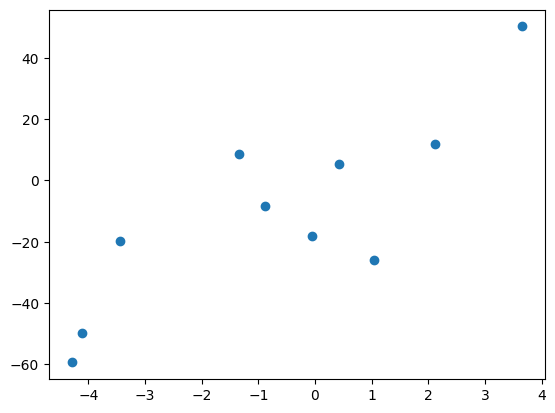

In [1]:
import numpy as np
from matplotlib import pyplot as plt

# First, create some data
# make a numpy array with N random values between -5 and 5
# rand(N) creates N numbers within the interval [0, 1)
# multiplying by 10 makes them in [0, 10), then subtracting 5 makes the set in [-5, 5)
N = 10
x = 10*np.random.rand(N) - 5

# now create y-values according to y = 3*x^3 - 4*x^2 - x + 1
y = x**3 + x**2 - x + 1

# add a small amount of randomness to the y-values so they are not perfectly on the curve
# here we use a normal distribution, centred at 0 with a standard deviation of 10
# we create N numbers from this distrubtion and add them to the y-values created above
# notice numpy does vector addition
y += np.random.normal(0, 10, N)

# plot the data points
plt.scatter(x,y)
plt.show()

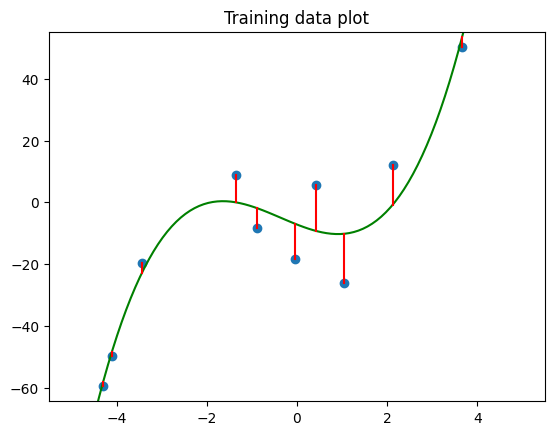

In [2]:
import numpy.polynomial.polynomial as poly

# choose the degree and fit a polynomial
# the coeffeicients are stored in w
degree = 3
w = poly.polyfit(x, y, degree)

# create a polynomial with the coefficients in w
p = poly.Polynomial(w)

# create an x-lattice of 100 evenly spaced points from -5 to 5  for plotting
x_lat = np.linspace(-5, 5, 100)

# plot the polynomial along with the data
plt.plot(x_lat, p(x_lat), color='g')
plt.scatter(x,y)
plt.ylim([min(y)-5, max(y)+5])
plt.title("Training data plot")
for i in range(len(x)):
    plt.plot([x[i], x[i]], [y[i], p(x[i])], color='r', linestyle='-')
plt.show()

In [3]:
# calculate and display the rmse
def rmse(y, y_hat):
    return (sum( (y-y_hat)**2 ) / len(y))**(1/2)

print("rmse =", rmse(y, p(x)))

rmse = 9.519293740914485


**<span style="color:green">Q: How well will this model do on new data?</span>**

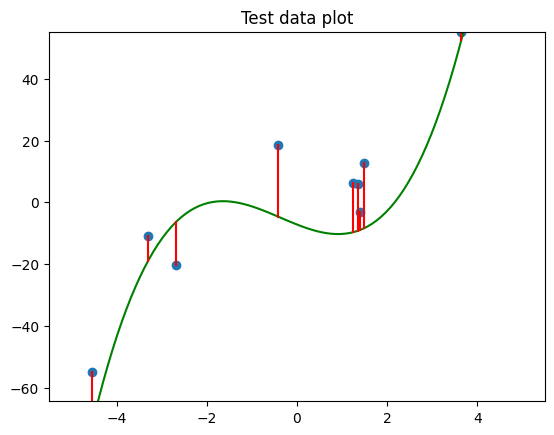

test rmse = 60.76050314430209


In [4]:
# create some test data using the same process as above
x_test = 10*np.random.rand(N) - 5
y_test = x_test**3 + x_test**2 - x_test + 1
y_test += np.random.normal(0, 10, N)

# create plot of predictions and test data, and display rmse
plt.plot(x_lat, p(x_lat), color='g')
plt.scatter(x_test, y_test)
for i in range(len(x)):
    plt.plot([x_test[i], x_test[i]], [y_test[i], p(x_test[i])], color='r', linestyle='-')
plt.title("Test data plot")
plt.ylim([min(y)-5, max(y)+5])
plt.show()
print("test rmse =", rmse(y, p(x_test)))

* The above code serves as a nice example of overfitting and underfitting.
* All supervised machine learning models face this issue.
* In realistice models, one cannot create such clear visualizations to gain understanding, but the principle is the same.

### How do we get the computer to pick the right model? By testing

* As we found above, it is useful to have *test* data that is not processed by the model during *training*.
* We will see later that three separate sets of data are needed to prevent *leakage*.
* **Leakage** is when information from outside the training set influences model development.
* When leakage occurs during development, the model may not perform as well on new data as expected from test results.
* For now, we will split our data into two subsets, using one for training and the other for testing.
* Comparing model performance metrics found from training and testing data reveals whether a model is overfitting or underfitting.

<br>
<img src='Fig4.4.png' width='600'/>
<br>

The example above shows test data in triangles. There are three cases:
* *Underfit*: large errors for both testing and training sets.
* *Fit the data well*: small errors for both testing and training sets.
* *Overfit*: small training error and large testing error. 

### Training/validation/testing split
* Recall that we must avoid leakage to keep the testing set as a true test of how well the model will do when it encounters new data.
* In the example above, we created polynomials of different degree, then chose the one that fit the data well and did not overfit or underfit.
* Could we use the test set rmse as an indication of how well the model will perform on new data? **No!**

**<span style="color:green">Q: Where did leakage occur above? What information from outside the training set has influenced model development?</span>**

* When we used the testing set to check the plot and rmse, this informed us on which degree of polynomial was best.
* Maybe the curve fit was particular to the training and testing data we had, and new data would be different?
* To try different hyperparameters and check for overfitting/underfitting, we need a third dataset, the **validation** set.
* Datasets are split into three subsets: training, validation, and testing.
    * *Training* data is used to fix the parameters through gradient descent.
    * *Validation* data is used to check for overfitting/underfitting, and to help select the best set of hyperparameters.
    * *Testing* data is used only after the final model is selected, to find metrics that provide a measure of how precise the model will be with new data once it is implemented.
* Which percentage of data to use in each set?
    * It is common to use 80%/10%/10% or 60%/20%/20% for training/validation/testing splits.
    * You can try changing these to improve performance.
    * You need to have enough training data to make a good model, and enough validation/testing data to get statistically reliable results.

### A numerical way to decide how complex our model should be: The model complexity graph

* In model development, we need to compare the training and validation errors of different models.
* This is aided by a plot showing the errors of the different models, which is *the model complexity graph*.

<img src='Fig4.5.png' width='500'/>

* Generally, as complexity increases, the training error will get lower then level out; the validation error will get lower, then start to increase.
* More complex datasets, and changing multiple hyperparameters, can make the graph more complicated. 
* When models perform similarly, choose the simplest model.
* Let's create a model complexity graph using code.

/home/jziprick/miniconda3/envs/SML/lib/python3.8/site-packages/numpy/polynomial/polynomial.py:1362: RankWarning: The fit may be poorly conditioned
  return pu._fit(polyvander, x, y, deg, rcond, full, w)


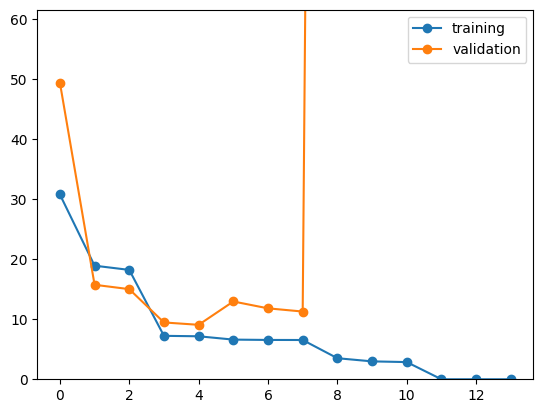

In [5]:
# start again making fresh data using the same method as above

N = 20
x = 10*np.random.rand(N) - 5
y = x**3 + x**2 - x + 1
y += np.random.normal(0, 10, N)

# now we split the data into training/validation/testing sets
# let's use 60/20/20
from sklearn.model_selection import train_test_split

# first take 60% as training data
x_train, x_valtest, y_train, y_valtest = train_test_split(x, y, train_size=0.6)

# now split the remaining data in half
x_val, x_test, y_val, y_test = train_test_split(x_valtest, y_valtest, train_size=0.5)

# fit models with different degrees and calculate training and validation rmse
degrees = range(int(N*0.6)+2)
p = []
rmse_train = []
rmse_val = []
for degree in degrees:
    w = poly.polyfit(x_train, y_train, degree)
    p.append(poly.Polynomial(w))
    rmse_train.append(rmse(y_train, p[degree](x_train)))
    rmse_val.append(rmse(y_val, p[degree](x_val)))

# now create the model complexity graph
plt.plot(degrees, rmse_train, marker = 'o')
plt.plot(degrees, rmse_val, marker = 'o')
plt.ylim([0, min(max(rmse_train)*2,max(rmse_val))])
plt.legend(['training', 'validation'])
plt.show()

**<span style="color:green">Q: Which model would you choose based on the above plot?</span>**
* Use the code below to plot any of the models and display error metrics.

training rmse = 6.549733462519674
validation rmse = 11.812059743779121
testing rmse = 11.319474295628625


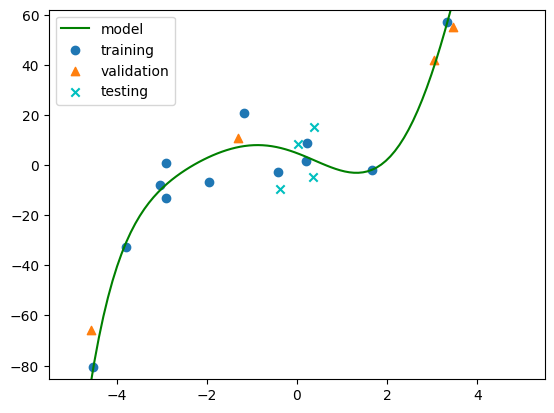

In [6]:
# choose the degree below to plot one of the models
degree = 6

print('training rmse =', rmse(y_train, p[degree](x_train)))
print('validation rmse =', rmse(y_val, p[degree](x_val)))
print('testing rmse =', rmse(y_test, p[degree](x_test)))

# create an x-lattice of 100 evenly spaced points from -5 to 5  for plotting
x_lat = np.linspace(-5, 5, 100)

# plot the polynomial along with the data
plt.plot(x_lat, p[degree](x_lat), color='g')
plt.scatter(x_train,y_train)
plt.scatter(x_val,y_val, marker='^')
plt.scatter(x_test,y_test, marker='x', color='c')
plt.ylim([min(y)-5, max(y)+5])
plt.legend(['model', 'training', 'validation', 'testing'])
plt.show()